In [1]:
# Dependencies and Setup
import json
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
query_url= base_url +  api_key + "&q=" + city
print(query_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9535eb11d60ce28ef59e939de006a6c9&q=khatanga


In [4]:
# Create a base URL

base_url="http://api.openweathermap.org/data/2.5/weather?"


#Create a counter for records retreival
record=1

#create a dataframe for cities


city_weather= pd.DataFrame({"City": cities})

#Create empty lists to append values of lat, lon, max temp, humidity, cloud coverage, wind speed, country, datetime

city_weather["Lat"]= ""
city_weather["Lng"]= ""
city_weather["Max Temp"]= ""
city_weather["Humidity"]=""
city_weather["Cloudiness"]= ""
city_weather["Wind Speed"]= ""
city_weather["Country"]= ""
city_weather["Date"]= ""


#Print beginning of loop 
print("Begin Data Retrieval")
print("-------------------------")



#loop through cities_pd and add rows

for index, row in city_weather.iterrows():
    
    city=row["City"]
    
    query_url= base_url + "appid=" + api_key + "&q=" + city
    weather_response=requests.get(query_url).json()
     
                                        
    try:
        print(f"Processing Record {record} | {city} ")
                                        
        city_weather.loc[index, "Lat"]=weather_response["coord"]["lat"]
        city_weather.loc[index, "Lng"]=weather_response["coord"]["lon"]
        city_weather.loc[index, "Max Temp"]=weather_response["main"]["temp_max"]
        city_weather.loc[index, "Humidity"]=weather_response["main"]["humidity"]
        city_weather.loc[index, "Cloudiness"]=weather_response["clouds"]["all"]
        city_weather.loc[index, "Wind Speed"]=weather_response["wind"]["speed"]
        city_weather.loc[index, "Country"]=weather_response["sys"]["country"]
        city_weather.loc[index, "Date"]=weather_response["dt"]
       

    except:
        
        print("City not found. Skipping...")
        
        
    
    record=record +1       


print("----------------------")
print("Data Retrival Complete")
print("----------------------")

Begin Data Retrieval
-------------------------
Processing Record 1 | khatanga 
Processing Record 2 | constitucion 
Processing Record 3 | hobart 
Processing Record 4 | ardakan 
Processing Record 5 | albany 
Processing Record 6 | igrim 
Processing Record 7 | rikitea 
Processing Record 8 | varniai 
Processing Record 9 | yellowknife 
Processing Record 10 | caravelas 
Processing Record 11 | georgetown 
Processing Record 12 | vostok 
Processing Record 13 | bengkulu 
Processing Record 14 | thompson 
Processing Record 15 | rocha 
Processing Record 16 | andros town 
Processing Record 17 | lebu 
Processing Record 18 | diffa 
Processing Record 19 | morondava 
Processing Record 20 | busselton 
Processing Record 21 | ushuaia 
Processing Record 22 | butaritari 
Processing Record 23 | port alfred 
Processing Record 24 | djenne 
Processing Record 25 | punta arenas 
Processing Record 26 | faya 
Processing Record 27 | mar del plata 
Processing Record 28 | tuktoyaktuk 
Processing Record 29 | cidreira 
Pr

Processing Record 229 | the valley 
Processing Record 230 | palabuhanratu 
City not found. Skipping...
Processing Record 231 | kosai 
Processing Record 232 | isilkul 
Processing Record 233 | soe 
Processing Record 234 | aksha 
Processing Record 235 | lompoc 
Processing Record 236 | bardiyah 
Processing Record 237 | yeppoon 
Processing Record 238 | sistranda 
Processing Record 239 | denpasar 
Processing Record 240 | tazovskiy 
Processing Record 241 | narasannapeta 
Processing Record 242 | tuatapere 
Processing Record 243 | torbay 
Processing Record 244 | turukhansk 
Processing Record 245 | raudeberg 
Processing Record 246 | burnie 
Processing Record 247 | saleaula 
City not found. Skipping...
Processing Record 248 | bitung 
Processing Record 249 | tessalit 
Processing Record 250 | madimba 
Processing Record 251 | vila velha 
Processing Record 252 | ostrovnoy 
Processing Record 253 | sivaki 
Processing Record 254 | atasu 
Processing Record 255 | omboue 
Processing Record 256 | ukiah 
Pro

Processing Record 455 | konin 
Processing Record 456 | waipawa 
Processing Record 457 | tsihombe 
City not found. Skipping...
Processing Record 458 | lanzhou 
Processing Record 459 | manado 
Processing Record 460 | kuytun 
Processing Record 461 | megion 
Processing Record 462 | banjar 
Processing Record 463 | murdochville 
Processing Record 464 | ocos 
Processing Record 465 | kalmunai 
Processing Record 466 | marawi 
Processing Record 467 | killam 
Processing Record 468 | shebalino 
Processing Record 469 | bihoro 
Processing Record 470 | general pico 
Processing Record 471 | popondetta 
Processing Record 472 | bibbiena 
Processing Record 473 | maues 
Processing Record 474 | mananara 
Processing Record 475 | lata 
Processing Record 476 | suez 
Processing Record 477 | durazno 
Processing Record 478 | kaspiyskiy 
Processing Record 479 | bolshiye saly 
City not found. Skipping...
Processing Record 480 | torres 
Processing Record 481 | derbent 
Processing Record 482 | zhezkazgan 
Processing

# Convert Raw Data to DataFrame

In [5]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5,257.57,97,89,1.28,RU,1666389546
1,constitucion,-35.3333,-72.4167,287.27,65,0,6.86,CL,1666389547
2,hobart,-42.8794,147.329,290.07,96,75,2.06,AU,1666389487
3,ardakan,32.31,54.0175,293.93,18,0,1.97,IR,1666389547
4,albany,42.6001,-73.9662,285.81,49,4,1.73,US,1666389304


In [6]:
# city_weather.to_csv("weather_csv", index=False, header=True)

In [7]:
city_weather["Lat"]=pd.to_numeric(city_weather["Lat"], errors='coerce')
city_weather["Lng"]=pd.to_numeric(city_weather["Lng"], errors='coerce')
city_weather["Max Temp"]=pd.to_numeric(city_weather["Max Temp"], errors='coerce')
city_weather["Humidity"]=pd.to_numeric(city_weather["Humidity"], errors='coerce')
city_weather["Cloudiness"]=pd.to_numeric(city_weather["Cloudiness"], errors='coerce')
city_weather["Wind Speek"]=pd.to_numeric(city_weather["Wind Speed"], errors='coerce')

city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Wind Speek
0,khatanga,71.9667,102.5000,257.57,97.0,89.0,1.28,RU,1666389546,1.28
1,constitucion,-35.3333,-72.4167,287.27,65.0,0.0,6.86,CL,1666389547,6.86
2,hobart,-42.8794,147.3294,290.07,96.0,75.0,2.06,AU,1666389487,2.06
3,ardakan,32.3100,54.0175,293.93,18.0,0.0,1.97,IR,1666389547,1.97
4,albany,42.6001,-73.9662,285.81,49.0,4.0,1.73,US,1666389304,1.73
...,...,...,...,...,...,...,...,...,...,...
590,mangan,27.5167,88.5333,289.02,44.0,0.0,3.4,IN,1666389781,3.40
591,naral,NaN,NaN,NaN,NaN,NaN,,,,NaN
592,ucluelet,48.9329,-125.5528,283.32,88.0,99.0,0.45,CA,1666389627,0.45
593,norsup,-16.0667,167.3833,299.42,81.0,100.0,6.11,VU,1666389782,6.11


In [8]:
city_weather.to_csv("weather_csv", index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%.

In [9]:
humidity_100=city_weather[(city_weather["Humidity"] >100)].count()["City"]
humidity_100

0

In [10]:
After inspecting the data, no cities were found to have a humidity>100%

SyntaxError: invalid syntax (1518751647.py, line 1)

# Plotting the Data

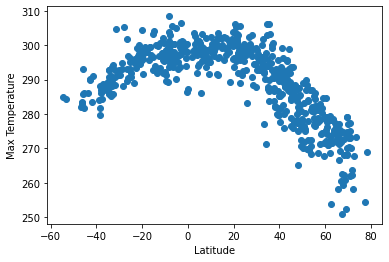

In [13]:
#Temperature Vs. Latitude
x_lat=city_weather["Lat"]
y_temp=city_weather["Max Temp"]
plt.scatter(x_lat, y_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")
plt.show()